In [2]:
import numpy as np
import h5py as h5

import os

In [18]:
name = 'baikal_multi_0523_flat_pureMC_h5s2_norm_small.h5'
path_to_h5 = '../data/' + name
with h5.File(path_to_h5, 'r') as hf:
    r = 'test'
    ids = hf[r+'/ev_ids_corr/data'][23200:24000]
    print(ids)

[b'mu_1139_11856' b'mu_1139_11857' b'mu_1139_11865' b'mu_1139_11866'
 b'mu_1139_11867' b'mu_1139_11871' b'mu_1139_11875' b'mu_1139_11877'
 b'mu_1139_11881' b'mu_1139_11882' b'mu_1139_11889' b'mu_1139_11895'
 b'mu_1139_11896' b'mu_1139_11898' b'mu_1139_11900' b'mu_1139_11901'
 b'mu_1139_11902' b'mu_1139_11903' b'mu_1139_11904' b'mu_1139_11907'
 b'mu_1139_11908' b'mu_1139_11919' b'mu_1139_11922' b'mu_1139_11924'
 b'mu_1139_11925' b'mu_1139_11927' b'mu_1139_11932' b'mu_1139_11936'
 b'mu_1139_11939' b'mu_1139_11941' b'mu_1139_11944' b'mu_1139_11945'
 b'mu_1139_11949' b'mu_1139_11953' b'mu_1139_11954' b'mu_1139_11956'
 b'mu_1139_11957' b'mu_1139_11958' b'mu_1139_11959' b'mu_1139_11960'
 b'mu_1139_11962' b'mu_1139_11970' b'mu_1139_11971' b'mu_1139_11972'
 b'mu_1139_11974' b'mu_1139_11976' b'mu_1139_11979' b'mu_1139_11980'
 b'mu_1139_11981' b'mu_1139_11985' b'mu_1139_11986' b'mu_1139_11988'
 b'mu_1139_11990' b'mu_1139_11992' b'mu_1139_11998' b'mu_1139_11999'
 b'mu_1139_12000' b'mu_1139_12003'

In [3]:
for name in list_of_files[0:1]:
    print(name)
    path_to_h5 = '../../../../../ivkhar/Baikal/data/' + name
    regime = 'val'
    #size = 10**5
    #start = 0
    with h5.File(path_to_h5, 'r') as hf:
        data = hf[regime + '/data/data']#[start:start+size]
        labels = np.zeros((data.shape[0], 1))
        ids = hf[regime + '/ev_ids/data']#[start:start+size]  # id of event - starting with 'nu' or 'mu'
        ids = np.array([i[0] for i in ids]).reshape(ids.shape[0],1)
        labels[:] = np.where(ids == 110, 1, 0)  # 110 - byte code for 'n'; 1 = nu, 0 = mu
        z_array = hf[regime + '/data/data'][:,:,4]

baikal_mu-nu-sep-test_h5-s2_entropy-095_norm.h5


In [4]:
z_nu = z_array[np.where(labels == 1)[0]]
z_mu = z_array[np.where(labels == 0)[0]]

In [47]:
from IPython.display import clear_output
preds = []
i = 0
for zs in z_array:
    if i % 1000 == 0:
        clear_output(wait=True)
        print('Event #', i)
    i+=1
    zs = zs[np.where(zs<3.0)[0]]
    zs = zs.reshape(len(zs),1)
    ax = np.array([i for i in range(len(zs))]).reshape(len(zs),1)
    reg = linear_model.LinearRegression()
    reg.fit(ax,zs)
    if reg.coef_[0,0]<0.2:
        preds.append(0)
    elif reg.coef_[0,0]<-0.06:
        preds.append(1)
    else:
        preds.append(0.5)
preds = np.array(preds).reshape(len(preds),1)

Event # 134000


In [48]:
d = preds-labels
idxs_false = np.where(d!=0)[0]
idxs_true = np.where(d==0)[0]
FP = len(np.where(d[idxs_false] == 1)[0])
FN = len(np.where(d[idxs_false] == -1)[0])
TP = len(np.where(preds[idxs_true] == 1)[0])
TN = len(np.where(preds[idxs_true] == 0)[0])

In [49]:
prec = TP/(TP+FP)
acc = (TP+TN)/(TP+TN+FP+FN)
rec = TP/(TP+FN)
print('Accuracy =', acc)
print('Precision =', prec)
print('Recall =', rec)

Accuracy = 0.734556315264185
Precision = 1.0
Recall = 0.2623157807584037


46 [0] [1.]
47 [0] [1.]
48 [0] [1.]
49 [0] [1.]
50 [0] [1.]
51 [0] [1.]
52 [0] [1.]
53 [0] [1.]
54 [0] [1.]
60 [0] [1.]


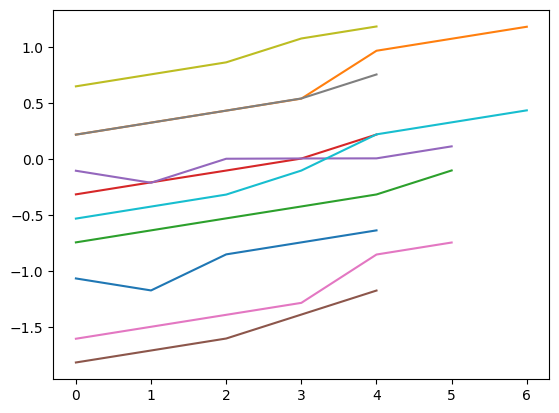

In [51]:
import matplotlib.pyplot as plt
j = 30
for i in idxs_false[j:j+10]:
    zs = z_array[i][np.where(z_array[i]<3.0)[0]]
    ax = [i for i in range(len(zs))]
    plt.plot(ax,zs)
    print(i,preds[i],labels[i])

In [52]:
l = [i for i in idxs_false if d[i] == 1]
FP_coef_list = []
for i in l:
    zs = z_array[i][np.where(z_array[i]<3.0)[0]]
    zs = zs.reshape(len(zs),1)
    ax = np.array([i for i in range(len(zs))]).reshape(len(zs),1)
    reg = linear_model.LinearRegression()
    reg.fit(ax,zs)
    FP_coef_list.append(reg.coef_[0,0])
    #plt.plot(ax,zs)
    #print(i,preds[i],labels[i])

In [53]:
l = [i for i in idxs_false if d[i] == -1]
FN_coef_list = []
for i in l:
    zs = z_array[i][np.where(z_array[i]<3.0)[0]]
    zs = zs.reshape(len(zs),1)
    ax = np.array([i for i in range(len(zs))]).reshape(len(zs),1)
    reg = linear_model.LinearRegression()
    reg.fit(ax,zs)
    FN_coef_list.append(reg.coef_[0,0])
    #plt.plot(ax,zs)
    #print(i,preds[i],labels[i])

In [54]:
max(FP_coef_list)

ValueError: max() arg is an empty sequence

In [55]:
min(FN_coef_list)

-0.05448784828186035